In [190]:
from pythainlp.tokenize import word_tokenize
import pythainlp
import json
import os
import regex as re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
os.chdir('C:\\Users\\iApp\\Desktop\\min projects\\ref')
with open('export.9000.formatted.json', 'r', encoding = 'utf8') as f:
    data = json.load(f)
# print(data.keys())
# print(len(data['db'].keys()))
# print(data['db']['01KZTrxgvC5mOovXFMPJ'].keys())
# print(data['db']['01KZTrxgvC5mOovXFMPJ']['title'])
# print(data['db']['01KZTrxgvC5mOovXFMPJ']['detail'])
n = 0
# check = 0
n_more2 = 0
broken = 0
for j in data['db']:
#     print(data['db'][j]['detail'])
    try:
        data['db'][j]['QA']
    except:
        broken = broken + 1
        continue
    for i in data['db'][j]['QA']:
#         print(f'Q: {i["q"]}')
#         print(f'A: {i["a"]}')
        n = n + 1
        if len(i["a"])>1:
            n_more2 = n_more2 + 1
#         if n > 20:
#             check = 1
#         if check:
#             break
#     if check:
#         break
print(f'broken: {broken}')
print(f'n: {n}')
print(f'n_more2: {n_more2}')
print(f'left: {n-n_more2}')
print(f'loss: {(n-n_more2)/n}')

broken: 1
n: 9170
n_more2: 1212
left: 7958
loss: 0.8678298800436205


In [124]:
LAWs = (\
        (r"(\[\s*\d+\s*\])", r'  '),
        (r'(–|-|—)',r' - '),
        (r"(,|;|&|'|\"|”|“|\?|√|≤|≥|\!|\\|≈|÷|′)", r'  '),
        (r":", r' : '),
        (r"(\(|\[|{)", r'  (  '),
        (r"(\)|\]|})", r'  )  '),
        (r"๑", r'1'),
        (r"๒", r'2'),
        (r"๓", r'3'),
        (r"๔", r'4'),
        (r"๕", r"5"),
        (r'๖', r"6"),
        (r"๗", r'7'),
        (r"๘", r"8"),
        (r'๙', r"9"),
        (r'๐', r"0"),
        
        (r'(เปอร์เซน|เปอร์เซ็น|เปอเซน|ร้อยละ|percent)', r" % "),
        (r'(ดอลลาร์|ดอลล่า|dollar)', r" $ "),
        (r'>', r" > "),
        (r'<', r" < "),
        (r"AAAAAวงเล็บ\]", r'  '),
        (r"AAAAAวงเล็บ\[", r'  '),
        (r'=', r' = '),
        (r'\*', r' * '),
        (r'\+', r' + '),
        (r'/', r' / '),
        (r'¼',r' 1 / 4 '),
        (r'½', r' 1 / 2 '),
        (r'¾', r' 3 / 4 '),
       )

In [171]:
#######################################
###########new methods for regular expression######\
#######################################
def check_float(string_in):
    for i in range(len(string_in)-2, -1, -1):
        if string_in[i+1] == '.' and string_in[i] <= '9' and string_in[i] >= '0':
            yield i+1

def replace_float(string_in):#return str
    if len(string_in) > 2:
        for i in check_float(string_in):#every floating point in string form ==> separaate them out
            string_in = string_in[:i] + ' . ' + string_in[i+1:]
        if string_in[0] == '.' and string_in[1] <= '9' and string_in[1] >= '0':
            string_in = '. ' + string_in[1:]
    return string_in.strip()

def clear_other_language(string_s):#return str
    regex = re.compile(r'[\n\r\t]')
    string_s = string_s.lower()
    string_s = regex.sub(" ", string_s)
    for string_to_be_replaced, string_to_replace in LAWs:
        string_s = re.sub(string_to_be_replaced, string_to_replace, string_s)
    string_s = ' '.join(string_s.split())
    return string_s.strip()

def fill_UNK(string_in):#return str
    return re.sub(r'\s([^A-Za-z0-9ก-๙-\(\)]+)\s',r'  ',string_in)

def overall_regex(string_s):#return str
    return ' '.join([i for i in replace_float(fill_UNK(clear_other_language(string_s))).strip().split()]) 

In [172]:
def my_unique_count(word_list, words_set):
    for word in word_list:
        if word in words_set:
            words_set[word] = words_set[word] + 1
        else:
            words_set[word] = 1
    return

In [180]:
word_set = dict()

total words: 2330
326
1
5.223175965665236


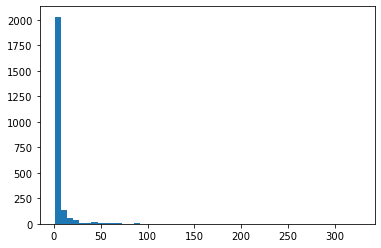

In [181]:
n = 1
for UID in data['db']:
    if not(n%50):
        break
    my_unique_count([i for i in word_tokenize(overall_regex(data['db'][UID]['title']), engine = 'deepcut') if i.strip() != ''], word_set)
    #print('-------------------------------------------')
    my_unique_count([i for i in word_tokenize(overall_regex(data['db'][UID]['detail']), engine = 'deepcut') if i.strip() != ''], word_set)
    #print('-------------------------------------------')
    n = n + 1
    for QA in data['db'][UID]['QA']:
        if len(QA['a']) > 1:
            continue
        my_unique_count([i for i in word_tokenize(overall_regex(QA["q"]), engine = 'deepcut') if i.strip() != ''], word_set) 
        my_unique_count([i for i in word_tokenize(overall_regex(QA["a"][0]), engine = 'deepcut') if i.strip() != ''], word_set)
print(f'total words: {len(word_set)}')
plt.hist(list(word_set.values()), 50)
print(max(word_set.values()))
print(min(word_set.values()))
print(np.mean(list(word_set.values())))

In [183]:
DF = pd.DataFrame(word_set.values(), word_set.keys())
DF.head()

,0
พัทธ์ธีรา ศรุติพงศ์โภคิน,6
(,128
เกิด,58
3,27
ธันวาคม,7


In [189]:
DF[DF[0] == 1]

,0
catholic,1
cathedral,1
college,1
ตรี,1
raffles,1
...,...
ภาวะ,1
แทรกซ้อน,1
เพราะ,1
จำกัด,1
